In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [225]:
df = pd.read_csv('file.csv', encoding='windows-1255')
df

,ISSUANCEDATE,BONDS,SERIES,ACTUALTERMTOMATURITY,ORIGINALTERMTOMATURITY,REDEMTIONDATE,COUPON,OFFEREDQUANTITY,PURCHASEDQUANTITY,ADDITIONALPURCHASED,AVERAGEPRICE,CUTOFFPRICE,TOTALFUNDING,DEMANDEDAMOUNT,COVERRATIO,GROSSAVGYIELD,GROSSCUTOFFYIELD
0,11/19/2024 12:00:00 AM,ממשלתית,1184076,28.0,31,29/11/2052,2.80,116.2,116.2,0.0,67.86,67.86,78.87,116.2,1.0,5.19,5.19
1,11/19/2024 12:00:00 AM,ממשלתית,1202332,10.4,11,30/03/2035,4.00,150.0,150.0,0.0,96.50,96.50,144.75,150.0,1.0,4.75,4.75
2,11/19/2024 12:00:00 AM,ממשלתית,1203579,2.9,4,30/09/2027,3.75,131.2,14.6,-116.6,98.54,98.54,14.40,14.6,0.1,4.50,4.50
3,11/19/2024 12:00:00 AM,ממשלתית,1212893,4.8,5,31/08/2029,4.60,163.5,159.2,-4.3,100.21,100.21,159.54,159.2,1.0,4.60,4.60
4,11/19/2024 12:00:00 AM,ממשלתית צמודה,1197326,3.9,5,31/10/2028,1.10,136.5,136.5,0.0,101.06,101.06,137.95,136.5,1.0,2.04,2.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,01/07/2020 00:00,ממשלתית בריבית משתנה,1141795,6.4,9,31/05/2026,0.13,56.6,46.4,-10.2,99.40,99.40,46.11,46.4,0.8,0.23,0.23
1924,01/06/2020 00:00,ממשלתית,1155068,3.9,5,30/11/2023,1.50,250.0,250.0,0.0,104.70,104.68,261.75,938.0,3.8,0.33,0.33
1925,01/06/2020 00:00,ממשלתית,1158104,2.6,3,31/07/2022,0.75,250.0,250.0,0.0,101.72,101.71,254.30,1345.0,5.4,0.21,0.21
1926,01/06/2020 00:00,ממשלתית צמודה,1157023,9.4,10,31/05/2029,0.50,250.0,250.0,0.0,112.13,112.11,280.33,1312.0,5.2,-0.07,-0.07


In [226]:
replacements = {'ממשלתית': 'GOV', 'ממשלתית בריבית משתנה': 'GOV_VAR','ממשלתית צמודה': 'GOV_INDEX', 'ממשלתית קצרה': 'GOV_SHORT'}
# replace values using the .map() method
df['BONDS'] = df['BONDS'].map(replacements)
df

,ISSUANCEDATE,BONDS,SERIES,ACTUALTERMTOMATURITY,ORIGINALTERMTOMATURITY,REDEMTIONDATE,COUPON,OFFEREDQUANTITY,PURCHASEDQUANTITY,ADDITIONALPURCHASED,AVERAGEPRICE,CUTOFFPRICE,TOTALFUNDING,DEMANDEDAMOUNT,COVERRATIO,GROSSAVGYIELD,GROSSCUTOFFYIELD
0,11/19/2024 12:00:00 AM,GOV,1184076,28.0,31,29/11/2052,2.80,116.2,116.2,0.0,67.86,67.86,78.87,116.2,1.0,5.19,5.19
1,11/19/2024 12:00:00 AM,GOV,1202332,10.4,11,30/03/2035,4.00,150.0,150.0,0.0,96.50,96.50,144.75,150.0,1.0,4.75,4.75
2,11/19/2024 12:00:00 AM,GOV,1203579,2.9,4,30/09/2027,3.75,131.2,14.6,-116.6,98.54,98.54,14.40,14.6,0.1,4.50,4.50
3,11/19/2024 12:00:00 AM,GOV,1212893,4.8,5,31/08/2029,4.60,163.5,159.2,-4.3,100.21,100.21,159.54,159.2,1.0,4.60,4.60
4,11/19/2024 12:00:00 AM,GOV_INDEX,1197326,3.9,5,31/10/2028,1.10,136.5,136.5,0.0,101.06,101.06,137.95,136.5,1.0,2.04,2.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,01/07/2020 00:00,GOV_VAR,1141795,6.4,9,31/05/2026,0.13,56.6,46.4,-10.2,99.40,99.40,46.11,46.4,0.8,0.23,0.23
1924,01/06/2020 00:00,GOV,1155068,3.9,5,30/11/2023,1.50,250.0,250.0,0.0,104.70,104.68,261.75,938.0,3.8,0.33,0.33
1925,01/06/2020 00:00,GOV,1158104,2.6,3,31/07/2022,0.75,250.0,250.0,0.0,101.72,101.71,254.30,1345.0,5.4,0.21,0.21
1926,01/06/2020 00:00,GOV_INDEX,1157023,9.4,10,31/05/2029,0.50,250.0,250.0,0.0,112.13,112.11,280.33,1312.0,5.2,-0.07,-0.07


In [227]:
features = df.select_dtypes(include=['float64', 'int64'])

scaled_data = StandardScaler().fit_transform(features)
df_scaled = pd.DataFrame(scaled_data, columns=features.columns)
df_columns=df[['BONDS']]
df_con = pd.concat([df_columns, df_scaled], axis=1)
df_con

,BONDS,SERIES,ACTUALTERMTOMATURITY,ORIGINALTERMTOMATURITY,COUPON,OFFEREDQUANTITY,PURCHASEDQUANTITY,ADDITIONALPURCHASED,AVERAGEPRICE,CUTOFFPRICE,TOTALFUNDING,DEMANDEDAMOUNT,COVERRATIO,GROSSAVGYIELD,GROSSCUTOFFYIELD
0,GOV,0.582266,2.192388,2.256391,1.060530,-0.837412,-0.739825,0.380462,-2.817428,-2.813133,-0.896934,-0.897927,-0.983577,1.777729,1.773128
1,GOV,1.628637,0.101104,0.005604,1.904291,-0.679762,-0.588632,0.380462,-0.192099,-0.188148,-0.597872,-0.868563,-0.983577,1.532986,1.528623
2,GOV,1.700111,-0.790068,-0.782172,1.728507,-0.767449,-1.194299,-2.754777,-0.005100,-0.001173,-1.189595,-0.986193,-1.392428,1.393927,1.389700
3,GOV,2.233957,-0.564304,-0.669633,2.326172,-0.616795,-0.547479,0.264840,0.147983,0.151890,-0.530733,-0.860571,-0.983577,1.449551,1.445269
4,GOV_INDEX,1.341711,-0.671245,-0.669633,-0.134799,-0.742729,-0.649020,0.380462,0.225900,0.229796,-0.628740,-0.880291,-0.983577,0.025590,0.022695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,GOV_VAR,-1.841135,-0.374188,-0.219475,-0.816840,-1.115399,-1.052052,0.106196,0.073734,0.077650,-1.045647,-0.958566,-1.074433,-0.981194,-0.983110
1924,GOV,-1.080372,-0.671245,-0.669633,0.146455,-0.213341,-0.141315,0.380462,0.559566,0.561585,-0.066751,-0.183982,0.288400,-0.925571,-0.927540
1925,GOV,-0.906359,-0.825715,-0.894711,-0.380896,-0.213341,-0.141315,0.380462,0.286400,0.289371,-0.100570,0.169602,1.015245,-0.992319,-0.994224
1926,GOV_INDEX,-0.968318,-0.017719,-0.106936,-0.556680,-0.213341,-0.141315,0.380462,1.240648,1.242578,0.017593,0.140933,0.924389,-1.148065,-1.149818


In [228]:
df_encoded = pd.get_dummies(df_con, columns=['BONDS'], dtype = int)
df_encoded

,SERIES,ACTUALTERMTOMATURITY,ORIGINALTERMTOMATURITY,COUPON,OFFEREDQUANTITY,PURCHASEDQUANTITY,ADDITIONALPURCHASED,AVERAGEPRICE,CUTOFFPRICE,TOTALFUNDING,DEMANDEDAMOUNT,COVERRATIO,GROSSAVGYIELD,GROSSCUTOFFYIELD,BONDS_GOV,BONDS_GOV_INDEX,BONDS_GOV_SHORT,BONDS_GOV_VAR
0,0.582266,2.192388,2.256391,1.060530,-0.837412,-0.739825,0.380462,-2.817428,-2.813133,-0.896934,-0.897927,-0.983577,1.777729,1.773128,1,0,0,0
1,1.628637,0.101104,0.005604,1.904291,-0.679762,-0.588632,0.380462,-0.192099,-0.188148,-0.597872,-0.868563,-0.983577,1.532986,1.528623,1,0,0,0
2,1.700111,-0.790068,-0.782172,1.728507,-0.767449,-1.194299,-2.754777,-0.005100,-0.001173,-1.189595,-0.986193,-1.392428,1.393927,1.389700,1,0,0,0
3,2.233957,-0.564304,-0.669633,2.326172,-0.616795,-0.547479,0.264840,0.147983,0.151890,-0.530733,-0.860571,-0.983577,1.449551,1.445269,1,0,0,0
4,1.341711,-0.671245,-0.669633,-0.134799,-0.742729,-0.649020,0.380462,0.225900,0.229796,-0.628740,-0.880291,-0.983577,0.025590,0.022695,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,-1.841135,-0.374188,-0.219475,-0.816840,-1.115399,-1.052052,0.106196,0.073734,0.077650,-1.045647,-0.958566,-1.074433,-0.981194,-0.983110,0,0,0,1
1924,-1.080372,-0.671245,-0.669633,0.146455,-0.213341,-0.141315,0.380462,0.559566,0.561585,-0.066751,-0.183982,0.288400,-0.925571,-0.927540,1,0,0,0
1925,-0.906359,-0.825715,-0.894711,-0.380896,-0.213341,-0.141315,0.380462,0.286400,0.289371,-0.100570,0.169602,1.015245,-0.992319,-0.994224,1,0,0,0
1926,-0.968318,-0.017719,-0.106936,-0.556680,-0.213341,-0.141315,0.380462,1.240648,1.242578,0.017593,0.140933,0.924389,-1.148065,-1.149818,0,1,0,0


In [229]:
# Calculating the correlation of column A against all others
corr_matrix = df_encoded.corr()

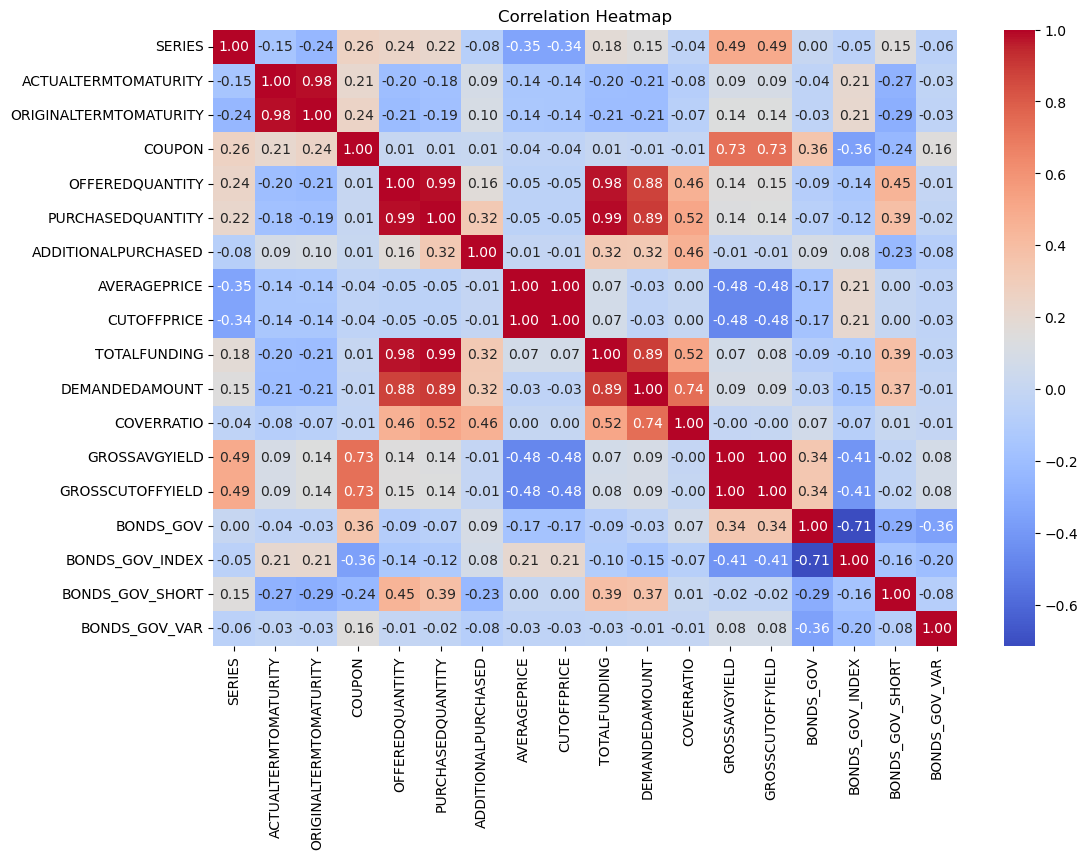

In [230]:
plt.figure(figsize=(12, 8))  # קבע את גודל הגרף
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [231]:
def vif(df):
    max_val = float('inf')
    while max_val> 5:
        vif_data = pd.DataFrame()
        X = df.select_dtypes(include=['float64', 'int64'])
        vif_data["feature"] = X.columns

        # calculating VIF for each feature
        vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                                    for i in range(len(X.columns))]
        max_val = max(vif_data["VIF"])
        for index, item in enumerate(vif_data['VIF']):
            if item >= max_val and max_val > 5:
                df = df.drop(vif_data.iloc[index,0] , axis = 1)
    return df,vif_data

In [232]:
df_vif,vif_data = vif(df_con)

In [233]:
df_vif

,BONDS,SERIES,ACTUALTERMTOMATURITY,COUPON,OFFEREDQUANTITY,ADDITIONALPURCHASED,AVERAGEPRICE,COVERRATIO,GROSSCUTOFFYIELD
0,GOV,0.582266,2.192388,1.060530,-0.837412,0.380462,-2.817428,-0.983577,1.773128
1,GOV,1.628637,0.101104,1.904291,-0.679762,0.380462,-0.192099,-0.983577,1.528623
2,GOV,1.700111,-0.790068,1.728507,-0.767449,-2.754777,-0.005100,-1.392428,1.389700
3,GOV,2.233957,-0.564304,2.326172,-0.616795,0.264840,0.147983,-0.983577,1.445269
4,GOV_INDEX,1.341711,-0.671245,-0.134799,-0.742729,0.380462,0.225900,-0.983577,0.022695
...,...,...,...,...,...,...,...,...,...
1923,GOV_VAR,-1.841135,-0.374188,-0.816840,-1.115399,0.106196,0.073734,-1.074433,-0.983110
1924,GOV,-1.080372,-0.671245,0.146455,-0.213341,0.380462,0.559566,0.288400,-0.927540
1925,GOV,-0.906359,-0.825715,-0.380896,-0.213341,0.380462,0.286400,1.015245,-0.994224
1926,GOV_INDEX,-0.968318,-0.017719,-0.556680,-0.213341,0.380462,1.240648,0.924389,-1.149818


In [234]:
vif_data

,feature,VIF
0,SERIES,1.515698
1,ACTUALTERMTOMATURITY,1.232786
2,COUPON,3.276477
3,OFFEREDQUANTITY,1.453898
4,ADDITIONALPURCHASED,1.295916
5,AVERAGEPRICE,1.937978
6,COVERRATIO,1.608513
7,GROSSCUTOFFYIELD,4.404321


In [250]:
df_encoded = pd.get_dummies(df_vif, columns=['BONDS'], dtype = int)
df_encoded

,SERIES,ACTUALTERMTOMATURITY,COUPON,OFFEREDQUANTITY,ADDITIONALPURCHASED,AVERAGEPRICE,COVERRATIO,GROSSCUTOFFYIELD,BONDS_GOV,BONDS_GOV_INDEX,BONDS_GOV_SHORT,BONDS_GOV_VAR
0,0.582266,2.192388,1.060530,-0.837412,0.380462,-2.817428,-0.983577,1.773128,1,0,0,0
1,1.628637,0.101104,1.904291,-0.679762,0.380462,-0.192099,-0.983577,1.528623,1,0,0,0
2,1.700111,-0.790068,1.728507,-0.767449,-2.754777,-0.005100,-1.392428,1.389700,1,0,0,0
3,2.233957,-0.564304,2.326172,-0.616795,0.264840,0.147983,-0.983577,1.445269,1,0,0,0
4,1.341711,-0.671245,-0.134799,-0.742729,0.380462,0.225900,-0.983577,0.022695,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1923,-1.841135,-0.374188,-0.816840,-1.115399,0.106196,0.073734,-1.074433,-0.983110,0,0,0,1
1924,-1.080372,-0.671245,0.146455,-0.213341,0.380462,0.559566,0.288400,-0.927540,1,0,0,0
1925,-0.906359,-0.825715,-0.380896,-0.213341,0.380462,0.286400,1.015245,-0.994224,1,0,0,0
1926,-0.968318,-0.017719,-0.556680,-0.213341,0.380462,1.240648,0.924389,-1.149818,0,1,0,0


In [252]:
# Calculating the correlation of column A against all others
corr_matrix = df_encoded.corr()

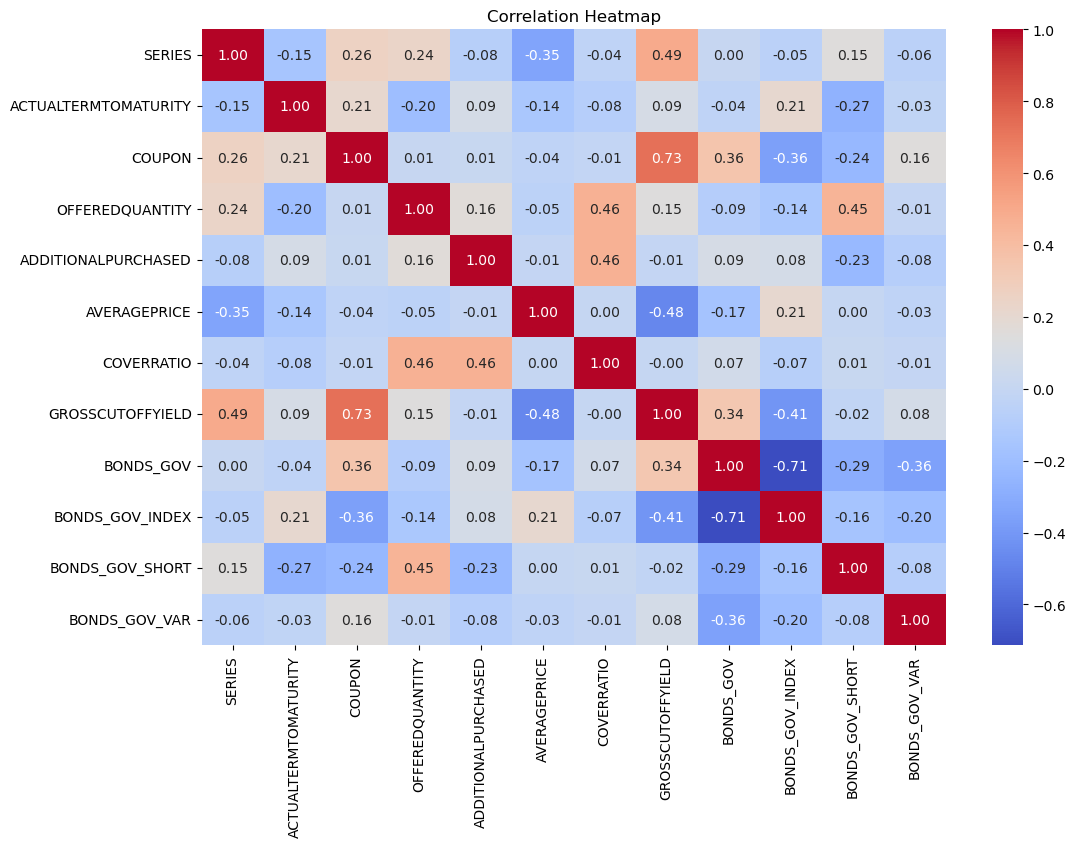

In [254]:
plt.figure(figsize=(12, 8))  # קבע את גודל הגרף
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# עבודה שוטפת עם המאגר בגיטהאב
### עדכון שינויים:

In [259]:
!git add .
!git commit -m "Supervised analysis"
!git push

On branch main
nothing to commit, working tree clean


fatal: The current branch main has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin main

To have this happen automatically for branches without a tracking
upstream, see 'push.autoSetupRemote' in 'git help config'.

